In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import our dataset and store in a Dataframe
df = pd.read_csv('banana_quality.csv')

df.head(5)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


### Check for missing data

In [4]:
df.info() # No null values in any category, so we can continue with next steps of the cleaning process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


### Visualizing our data and Handling Outliers

- Identify outliers in the dataset using visualizations or statistical methods
- We will create a histogram to help identify any outliers in our dataset

<Axes: xlabel='Size', ylabel='Count'>

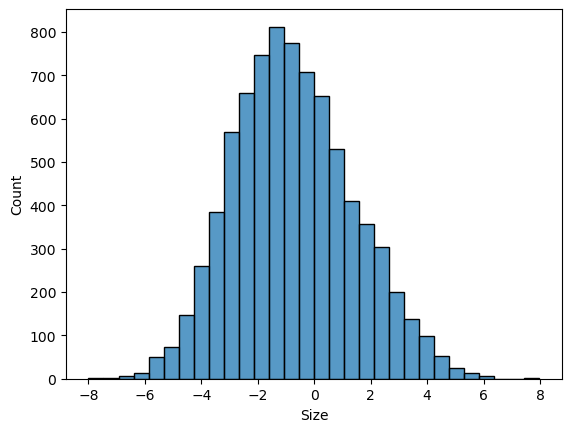

In [5]:
# Boxplot shows qualitative data that facilitates comparisons between data
sns.histplot(df['Size'],kde=False,bins=30)

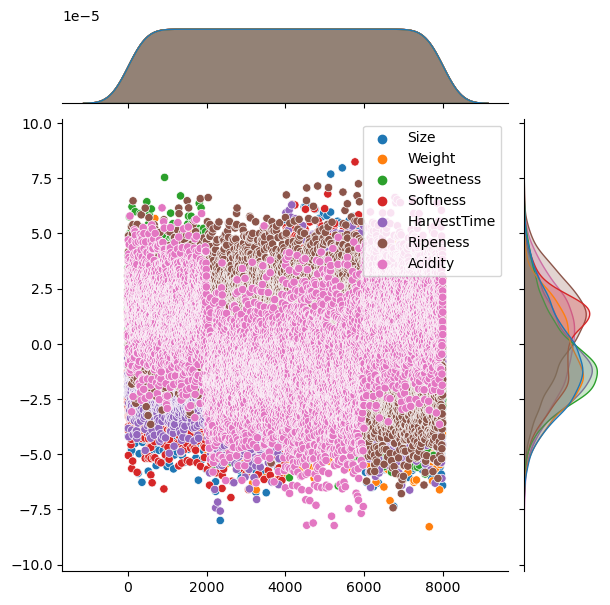

In [23]:
sns.jointplot(data=df[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness','Acidity']])

### Here we calculate the zscore for each value in the size column, remove them, and save as a new dataset

In [6]:
# Calculate the Z Score
df['Size_Zscore'] = (df['Size'] - df['Size'].mean()) / df['Size'].std()

# Identify and remove outliers
threshold = 3
df_no_outliers = df[(np.abs(df['Size_Zscore']) < threshold)]

In [7]:
df_no_outliers.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality,Size_Zscore
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good,-0.551102
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good,-0.778058
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good,0.182674
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good,-0.056517
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good,0.655249


In [8]:
# Conduct the train test split on our dataset
# Features are size, weight, sweetness, softness, HarvestTime, Ripeness, Acidity, label is Quality
from sklearn.model_selection import train_test_split

X=df_no_outliers[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity']]
y =df_no_outliers['Quality']

# using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)




### Now we will Standardize our data to preserve the relationships between our data points and reduce sensitivity to outliers (we removed them earlier but I want to ensure accuracy)

#### Why are we doing this?
- To scale the numerical features in the dataset to a similar range to prevent certain features from dominating the model training process
- Useful when the distribution of the data is Guassian or unknown (our histogram shows that our data is indeed a Gaussian Distribution)
- Less sensitive to outliers

In [9]:
# Import the standardization library from sklearn
from sklearn.preprocessing import StandardScaler

# Create a copy of our datasets from the train test split
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Numerical Features
num_cols = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity']

# apply standardization on the numerical features of our dataset
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    X_test_stand[i] = scale.transform(X_test_stand[[i]])

### Classification Model - Support Vector Machine for Binary Classification

In [10]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train_stand,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_stand)


# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8752086811352254


### Hyper Tune the model

In [11]:
# import GridSearch
from sklearn import svm
from sklearn.model_selection import GridSearchCV

grid = {
    'C':[0.01,0.1,1,10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01,1]
}

svm = svm.SVC(kernel='linear')

svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train_stand, y_train)

print("Best Parameters:",svm_cv.best_params_)

print("Train Score:",svm_cv.best_score_)

print("Test Score:",svm_cv.score(X_test_stand,y_test))


KeyboardInterrupt

